In [1]:
#credits
# https://youtu.be/ho6JXE3EbZ8
#@author: Sreenivas Bhattiprolu

import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, Dropout, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import os
import math

In [3]:
from tensorflow.keras.models import load_model
model = load_model(os.path.join('saved_models','custom_CNN.h5'))

In [4]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 52, 52, 64)       

layer = model.layers

In [5]:
layer = model.layers

In [11]:
layer

In [19]:
i=0
filters, biases = model.layers[i].get_weights()
print(layer[i].name, filters.shape)

conv2d_28 (3, 3, 3, 16)


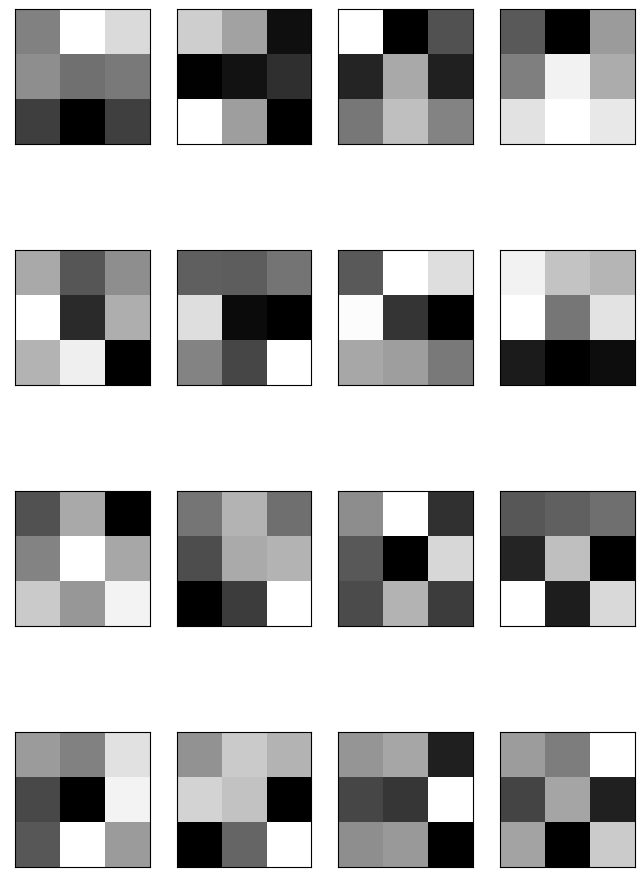

In [21]:
fig1=plt.figure(figsize=(8, 12))
columns = 4
rows = 4
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()

In [37]:
#### Now plot filter outputs    

#Define a new truncated model to only include the conv layers of interest
#conv_layer_index = [1, 3, 6, 8, 11, 13, 15]
conv_layer_index = [0, 3, 7]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28_input (InputLayer) [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 54, 54, 32)        0   

In [38]:
img_path='Dataset/cell_images/Parasitized/C39P4thinF_original_IMG_20150622_105102_cell_83.png'

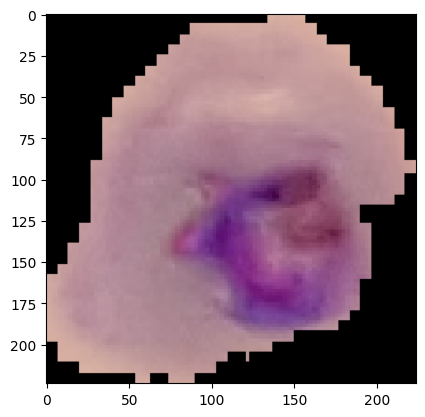

In [46]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img(img_path, target_size=(224, 224))
plt.imshow(img)

In [40]:
# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)

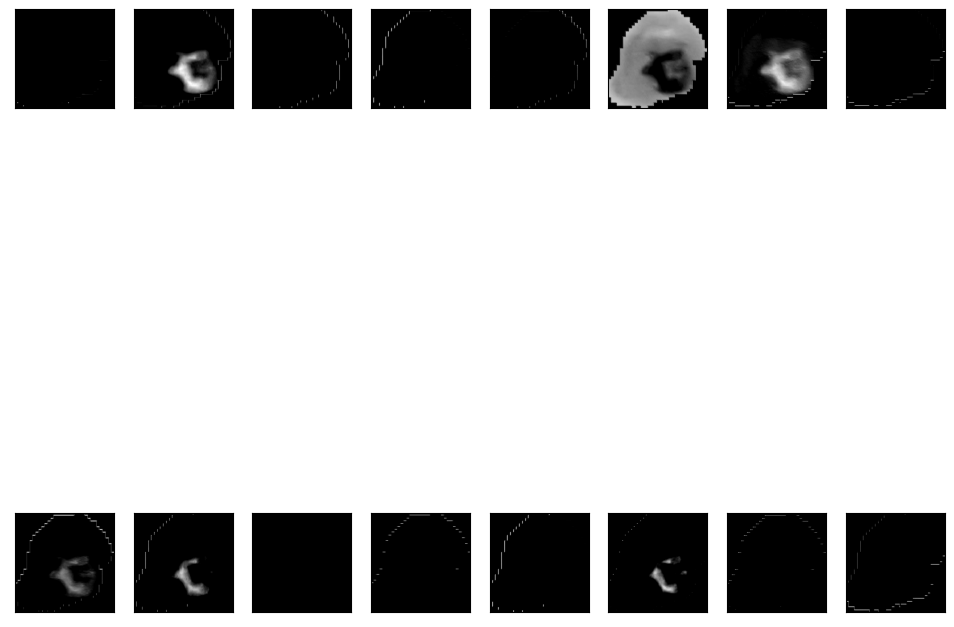

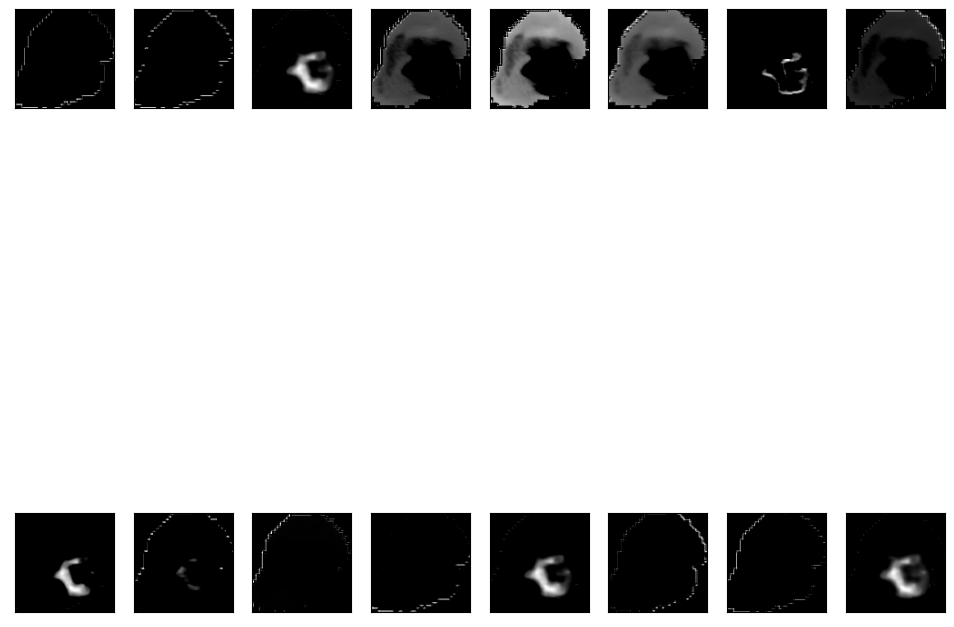

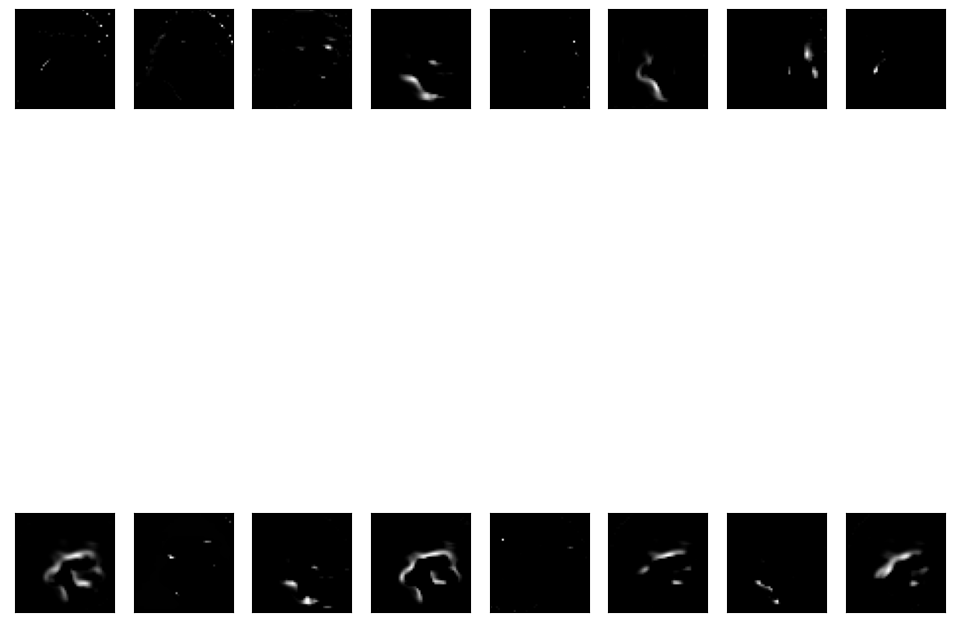

In [41]:
columns = 8
rows = 2
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()

max pool later 1 th:


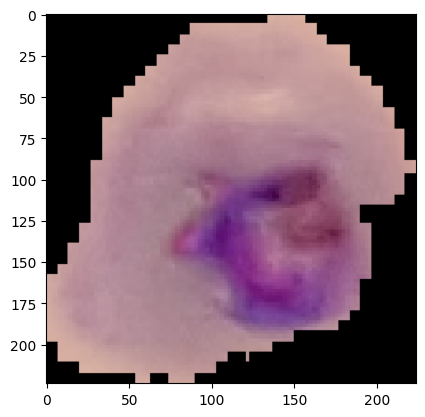

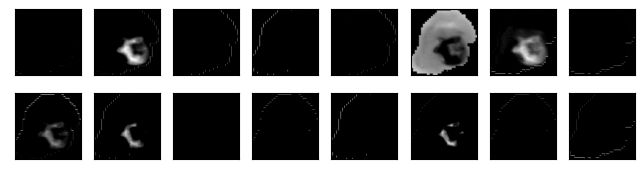

max pool later 2 th:


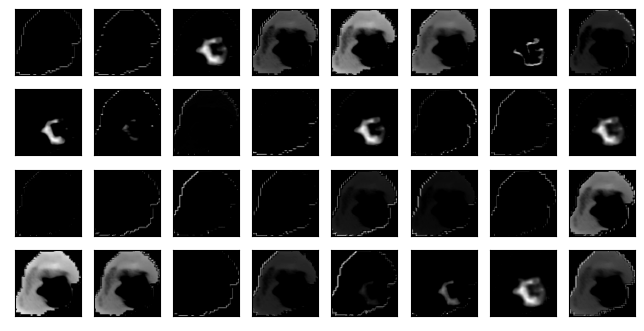

max pool later 3 th:


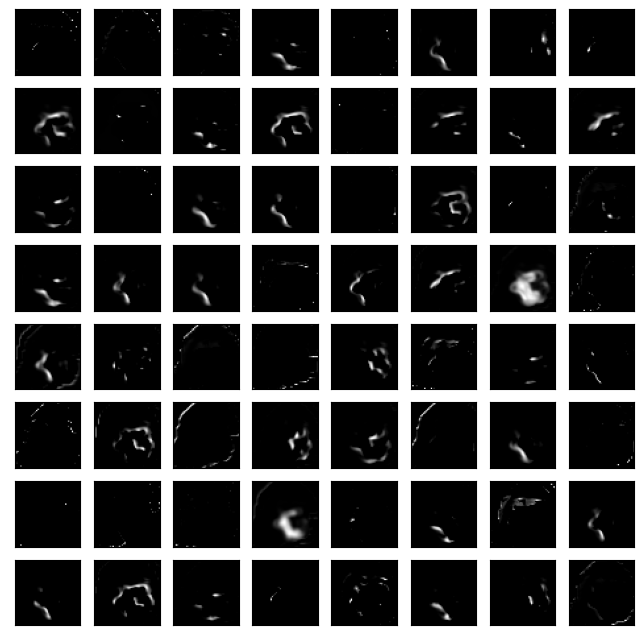

In [62]:
img_path='Dataset/cell_images/Parasitized/C39P4thinF_original_IMG_20150622_105102_cell_83.png'
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img(img_path, target_size=(224, 224))
plt.imshow(img)
# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)
columns = 8
rows = 2
j=1
for ftr in feature_output:
    #pos = 1
    print('max pool later',j,'th:')
    fig=plt.figure(figsize=(columns,rows))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    rows*=2
    j+=1
    plt.show()

max pool later 1 th:


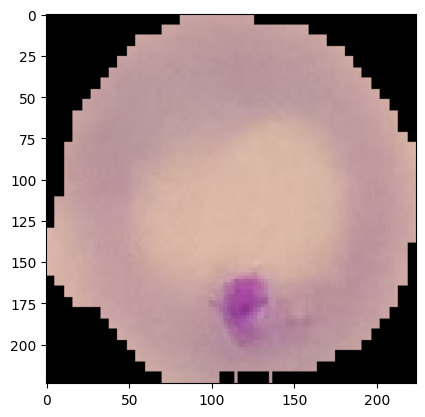

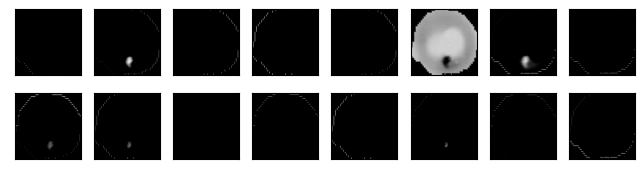

max pool later 2 th:


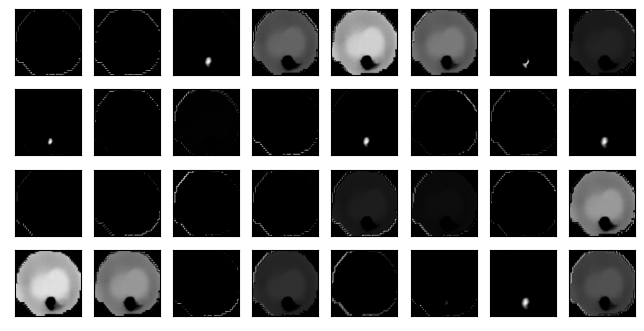

max pool later 3 th:


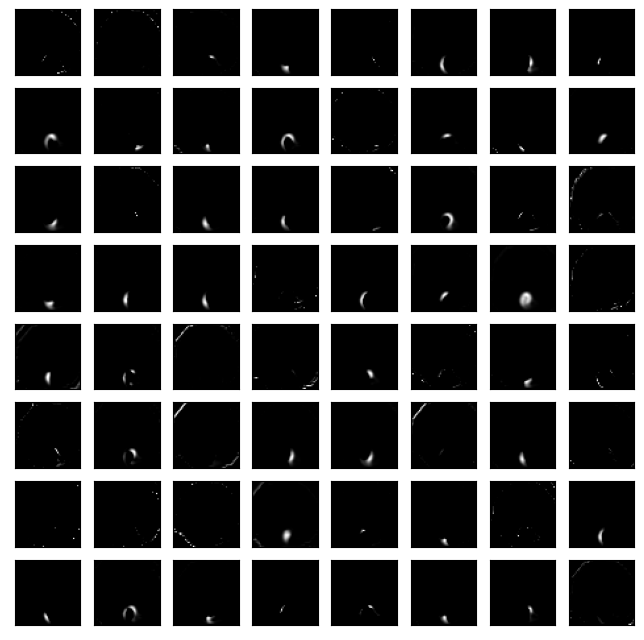

In [61]:
img_path='Dataset/cell_images/Parasitized/C39P4thinF_original_IMG_20150622_105253_cell_105.png'
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img(img_path, target_size=(224, 224))
plt.imshow(img)
# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)
columns = 8
rows = 2
j=1
for ftr in feature_output:
    #pos = 1
    print('max pool later',j,'th:')
    fig=plt.figure(figsize=(columns,rows))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    rows*=2
    j+=1
    plt.show()